In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv("movie_data.csv")
movies.head()

,runtime,vote_average,release_month,Comedy,Crime,Drama,Action,Thriller,Romance,Adventure,...,Documentary,Western,Empty,TVMovie,Foreign,PC_class,log_budget,log_revenue,log_popularity,log_vote_count
0,105.0,8.2,5,1,1,0,0,0,0,0,...,0,0,0,0,0,2,14.616391,17.661131,2.289601,8.460199
1,111.0,8.3,9,0,1,1,1,0,0,0,...,0,0,0,0,0,3,17.181426,18.221813,3.572093,9.278279
2,81.0,7.3,3,0,0,1,1,1,0,0,...,0,0,0,0,0,3,14.741554,16.299710,2.411977,7.303843
3,104.0,7.8,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,16.562782,18.685736,2.897458,8.782630
4,119.0,7.4,3,1,0,0,0,0,1,0,...,0,0,0,0,0,1,17.172408,20.671077,3.953932,8.633375


In [3]:
log_revenue = pd.DataFrame(movies['log_revenue'])
X = pd.DataFrame(movies.drop(['log_revenue'],axis = 1))


In [4]:
X_train,X_test,log_revenue_train,log_revenue_test = train_test_split(X,log_revenue,test_size=0.25)

[Text(855.6, 1494.8999999999999, 'X[27] <= 6.353\nmse = 4.215\nsamples = 3354\nvalue = 17.738'),
 Text(297.6, 1223.1, 'X[25] <= 4.335\nmse = 4.955\nsamples = 1317\nvalue = 16.255'),
 Text(74.4, 951.3, 'X[1] <= 5.3\nmse = 19.803\nsamples = 9\nvalue = 4.306'),
 Text(37.2, 679.4999999999999, 'mse = 0.0\nsamples = 1\nvalue = 16.258'),
 Text(111.60000000000001, 679.4999999999999, 'X[25] <= 2.172\nmse = 2.19\nsamples = 8\nvalue = 2.812'),
 Text(74.4, 407.6999999999998, 'mse = 0.0\nsamples = 2\nvalue = 0.693'),
 Text(148.8, 407.6999999999998, 'X[25] <= 2.596\nmse = 0.925\nsamples = 6\nvalue = 3.518'),
 Text(111.60000000000001, 135.89999999999986, 'mse = 0.224\nsamples = 3\nvalue = 2.698'),
 Text(186.0, 135.89999999999986, 'mse = 0.283\nsamples = 3\nvalue = 4.338'),
 Text(520.8000000000001, 951.3, 'X[25] <= 16.753\nmse = 3.864\nsamples = 1308\nvalue = 16.337'),
 Text(372.0, 679.4999999999999, 'X[25] <= 14.516\nmse = 4.557\nsamples = 638\nvalue = 15.545'),
 Text(297.6, 407.6999999999998, 'X[0] 

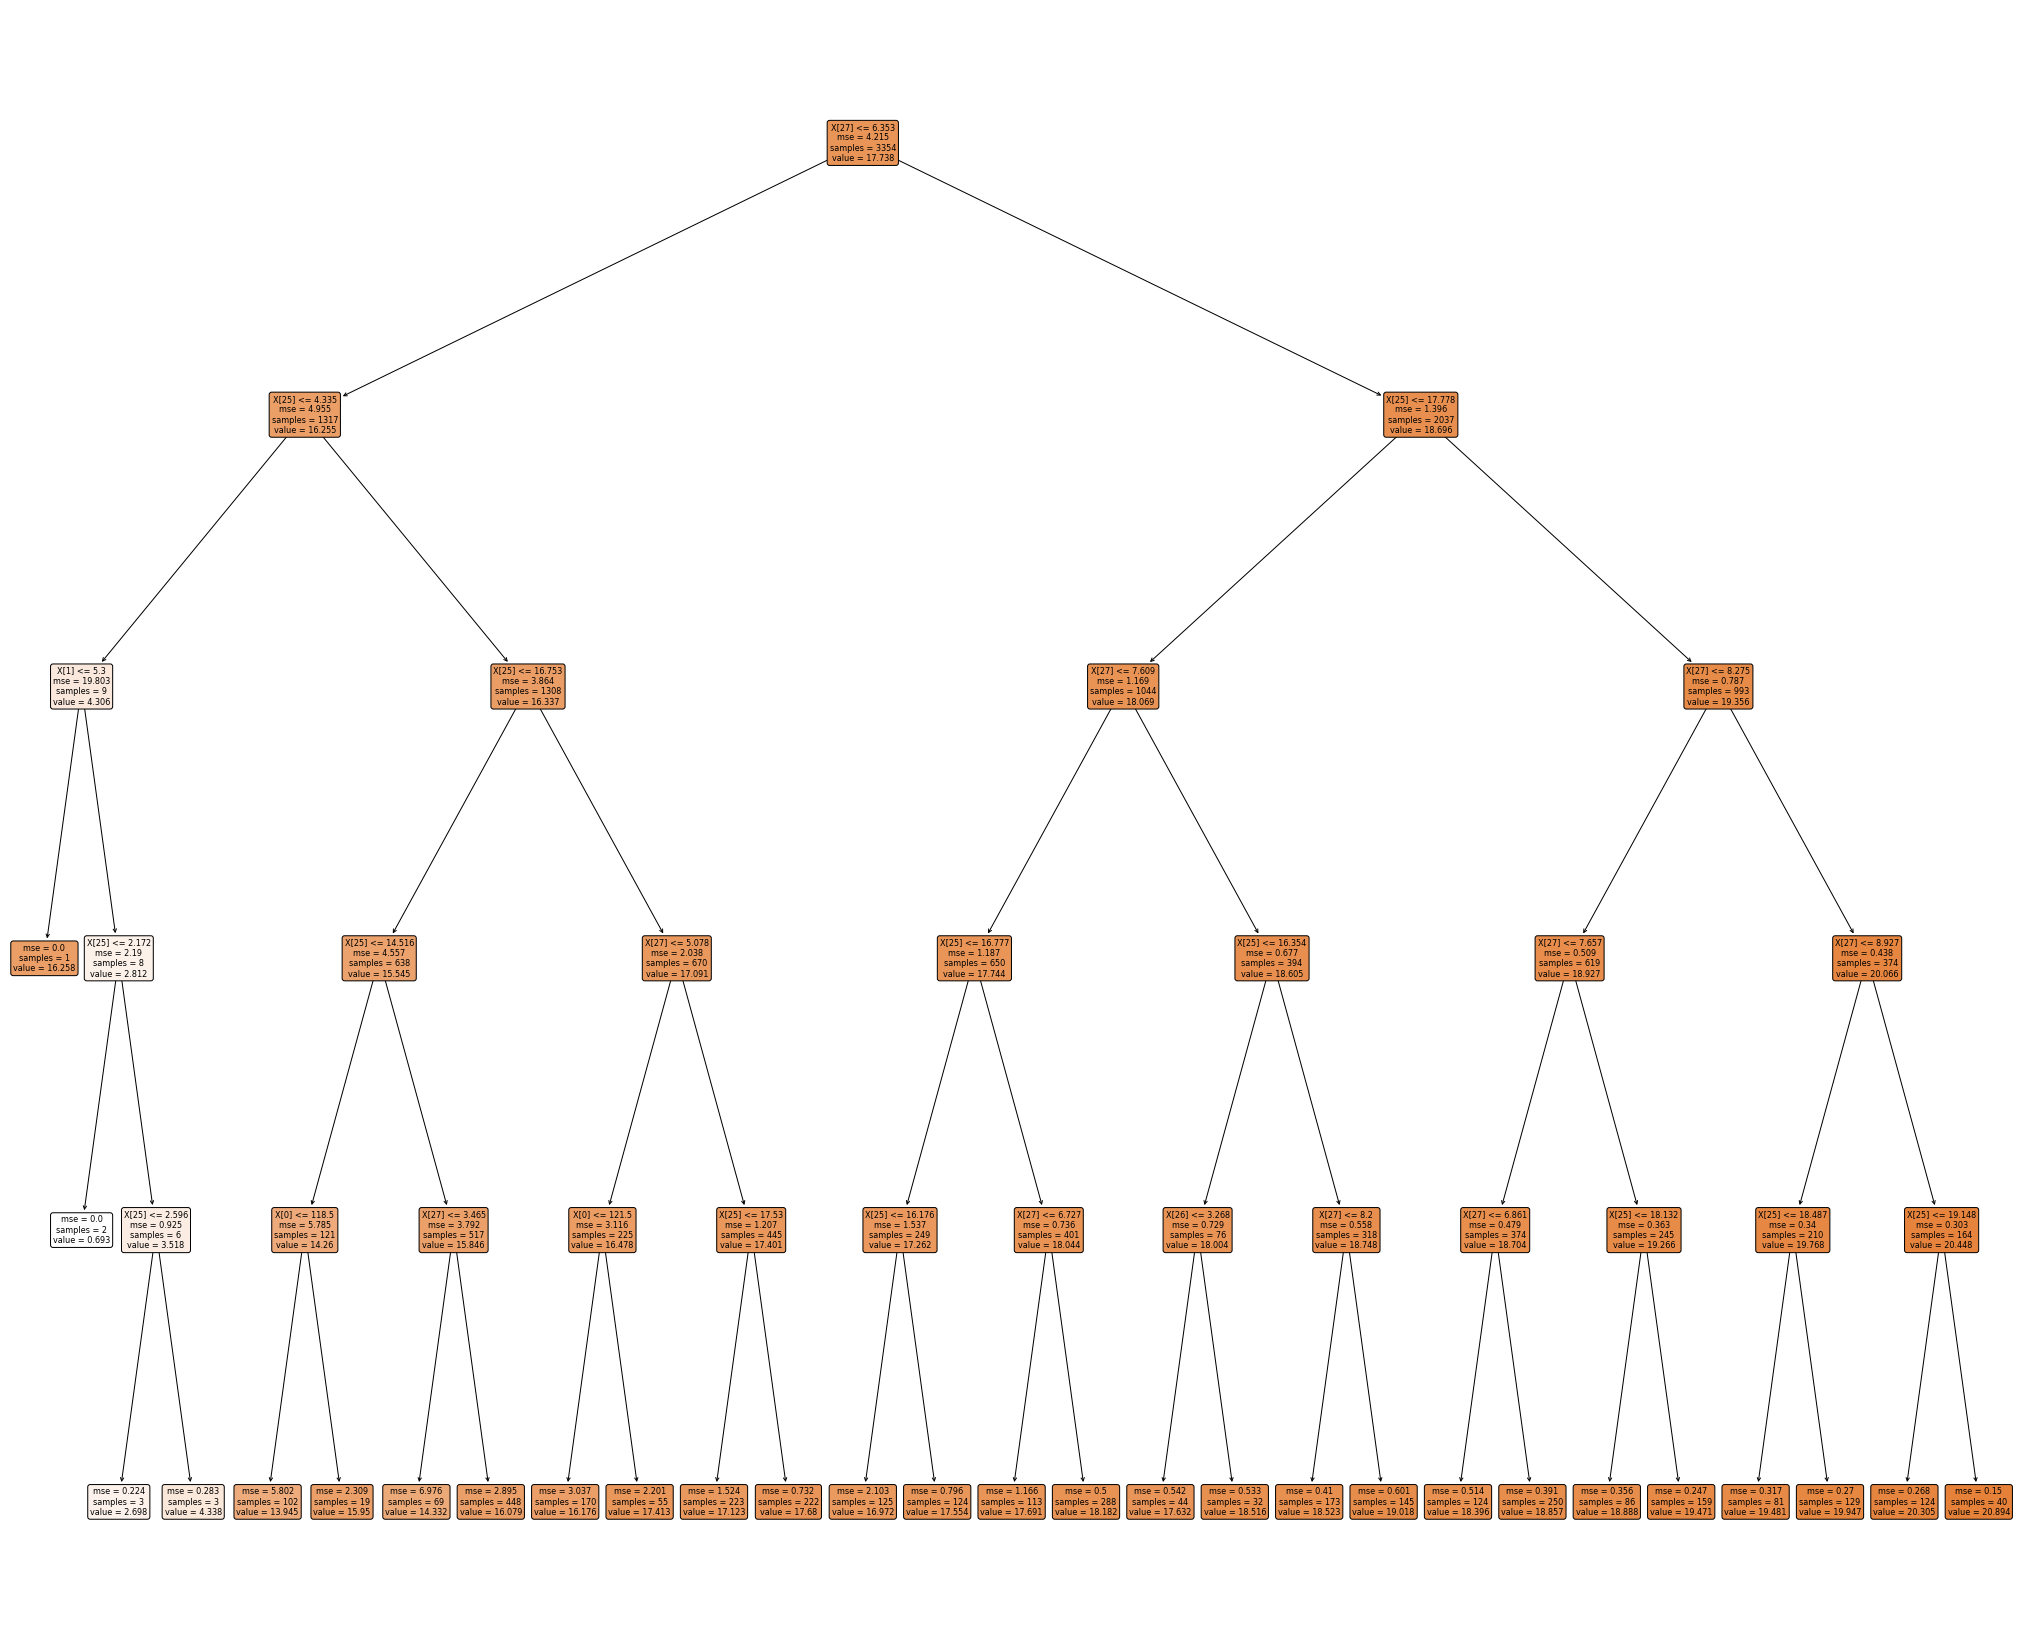

In [17]:
RegressionTree = DecisionTreeRegressor(max_depth=5)
RegressionTree.fit(X_train,log_revenue_train)

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,30))
plot_tree(RegressionTree, filled=True, rounded=True)

In [6]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", RegressionTree.score(X_train, log_revenue_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", RegressionTree.score(X_test, log_revenue_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6659827557239109

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5545742947799496



In [7]:
# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [8]:
y_train_pred = RegressionTree.predict(X_train)
y_test_pred = RegressionTree.predict(X_test)

In [9]:
mse = mean_sq_err(log_revenue_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 7.022777800192815
Root Mean Squared Error (RMSE) 	: 2.6500524146123627


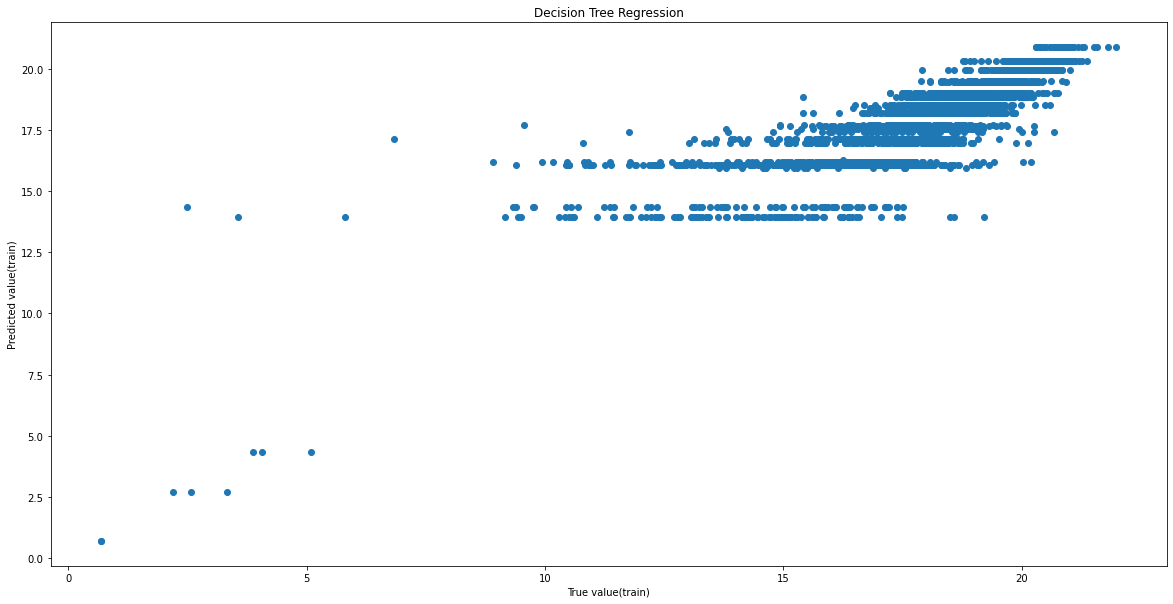

In [10]:
plt.figure(figsize = (20,10))
plt.scatter(x = log_revenue_train,y = y_train_pred,)
plt.xlabel("True value(train)")
plt.ylabel("Predicted value(train)")
plt.title("Decision Tree Regression")
plt.show()

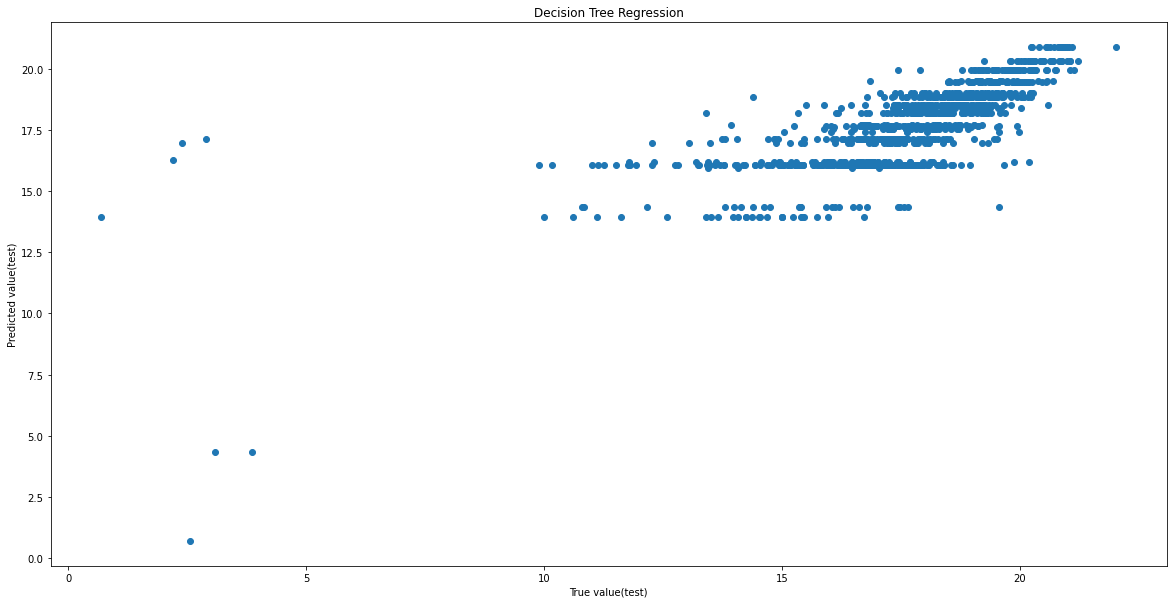

In [11]:
plt.figure(figsize = (20,10))
plt.scatter(x = log_revenue_test,y = y_test_pred,)
plt.xlabel("True value(test)")
plt.ylabel("Predicted value(test)")
plt.title("Decision Tree Regression")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=7)
regr.fit(X_train,log_revenue_train['log_revenue'])

RandomForestRegressor(max_depth=7)

In [13]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", regr.score(X_train, log_revenue_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", regr.score(X_test, log_revenue_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7760530364604951

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6565598995183328



In [14]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

mse = mean_sq_err(log_revenue_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 7.058672429776652
Root Mean Squared Error (RMSE) 	: 2.6568162205498242


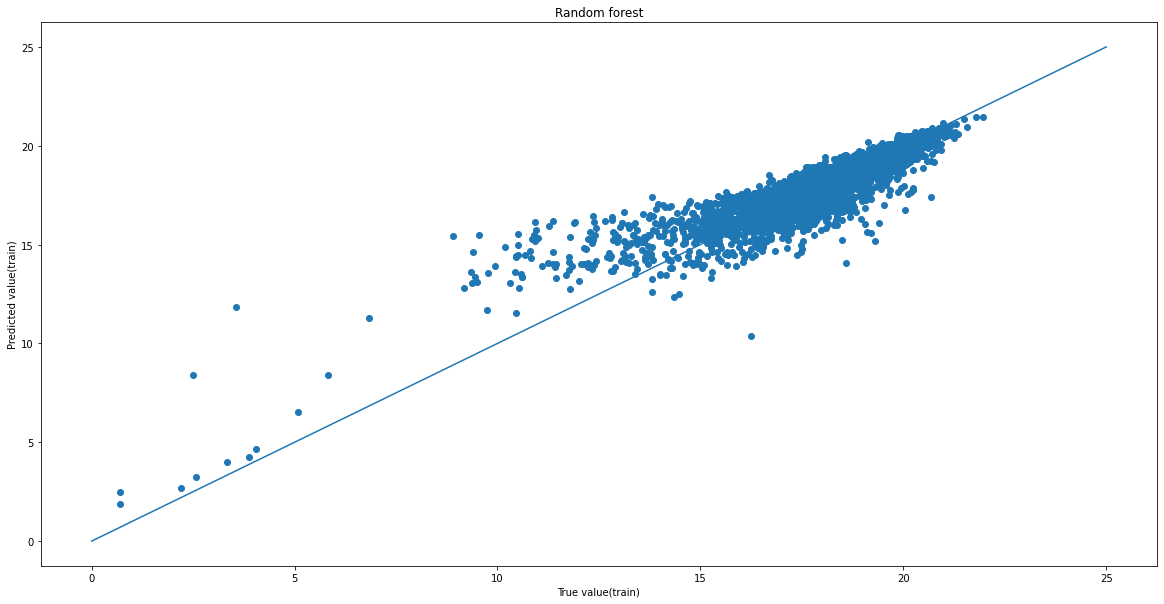

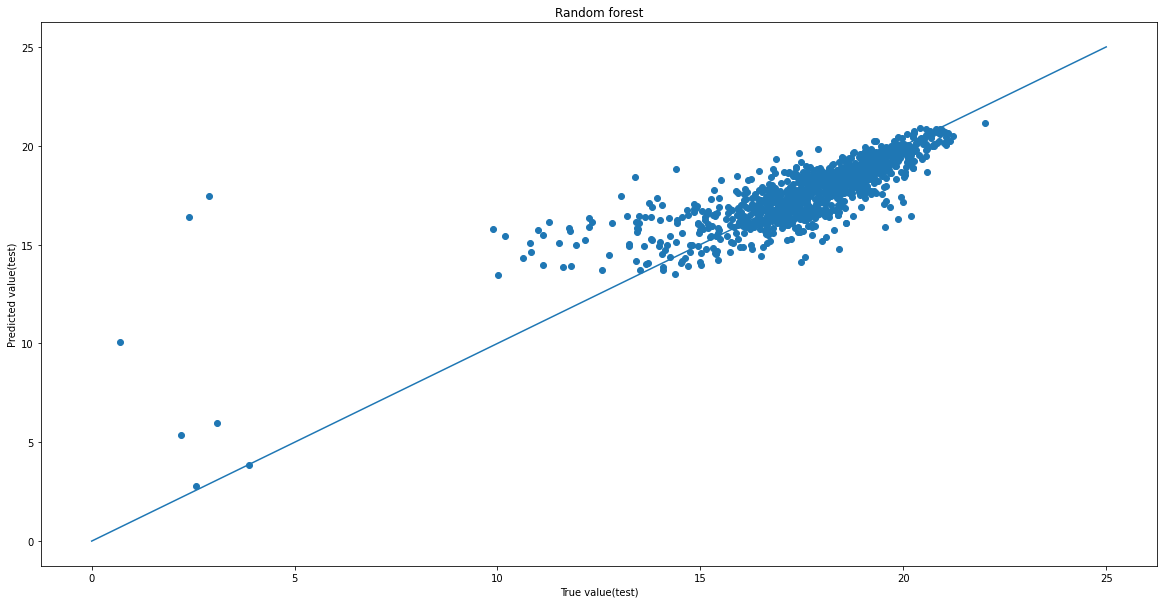

In [15]:
plt.figure(figsize = (20,10))
plt.scatter(x = log_revenue_train,y = y_train_pred)
a = np.linspace(0,25,1000)
plt.plot(a,a)
plt.xlabel("True value(train)")
plt.ylabel("Predicted value(train)")
plt.title("Random forest")
plt.show()

plt.figure(figsize = (20,10))
plt.scatter(x = log_revenue_test,y = y_test_pred)
a = np.linspace(0,25,1000)
plt.plot(a,a)
plt.xlabel("True value(test)")
plt.ylabel("Predicted value(test)")
plt.title("Random forest")
plt.show()